# Lung Cancer Survey – Exploratory Data Analysis (EDA)

**Exploring patterns, symptoms, and lifestyle habits related to lung cancer**

This notebook analyzes a lung cancer survey dataset collected from individuals based on symptoms and habits like smoking, alcohol consumption, chest pain, etc. The goal is not to build a predictive model, but to understand relationships, distributions, and patterns within the data.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot styling
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv('/kaggle/input/lung-cancer/survey lung cancer.csv')

# Cleaning column names: remove spaces, standardize
df.columns = [col.strip().upper().replace(" ", "_") for col in df.columns]

# Show the first few rows
df.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [2]:
# Shape and basic info
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())


Shape of dataset: (309, 16)

Data types:
 GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC_DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL_CONSUMING         int64
COUGHING                  int64
SHORTNESS_OF_BREATH       int64
SWALLOWING_DIFFICULTY     int64
CHEST_PAIN                int64
LUNG_CANCER              object
dtype: object

Missing values:
 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANC

In [3]:
# Unique values per column
df.nunique()


GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC_DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL_CONSUMING         2
COUGHING                  2
SHORTNESS_OF_BREATH       2
SWALLOWING_DIFFICULTY     2
CHEST_PAIN                2
LUNG_CANCER               2
dtype: int64

**Target Variable Distribution**

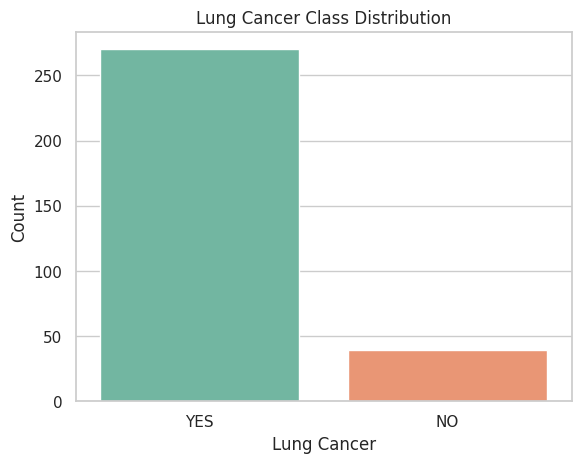

LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64

In [4]:
sns.countplot(data=df, x='LUNG_CANCER', palette='Set2')
plt.title("Lung Cancer Class Distribution")
plt.xlabel("Lung Cancer")
plt.ylabel("Count")
plt.show()

# Numerical distribution
df['LUNG_CANCER'].value_counts()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


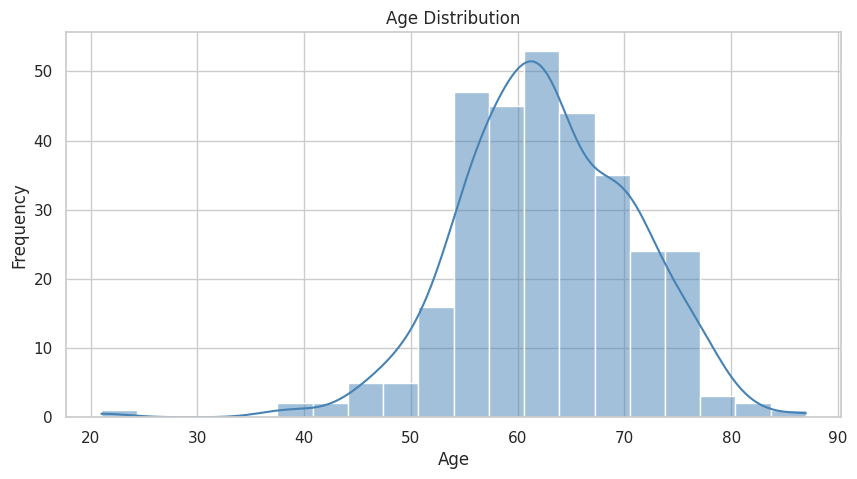

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(df['AGE'], bins=20, kde=True, color='steelblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


**Gender Distribution**

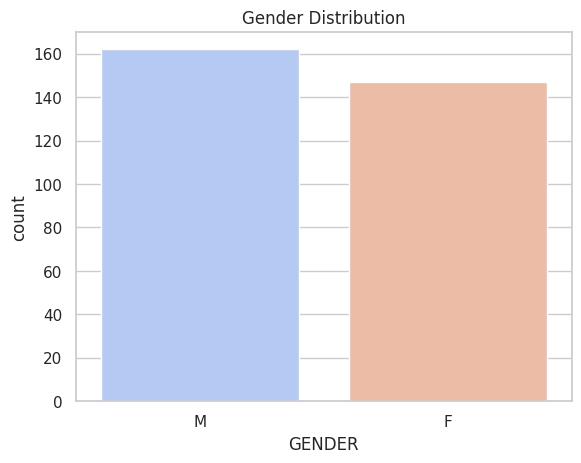

LUNG_CANCER,NO,YES
GENDER,,
F,14.965986,85.034014
M,10.493827,89.506173


In [6]:
sns.countplot(data=df, x='GENDER', palette='coolwarm')
plt.title("Gender Distribution")
plt.show()

# Crosstab with lung cancer
pd.crosstab(df['GENDER'], df['LUNG_CANCER'], normalize='index') * 100


**Smoking & Yellow Fingers**

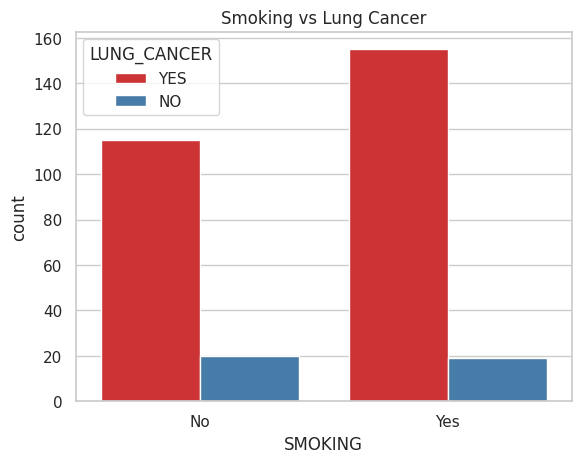

In [7]:
# Smoking vs Lung Cancer
sns.countplot(data=df, x='SMOKING', hue='LUNG_CANCER', palette='Set1')
plt.title("Smoking vs Lung Cancer")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


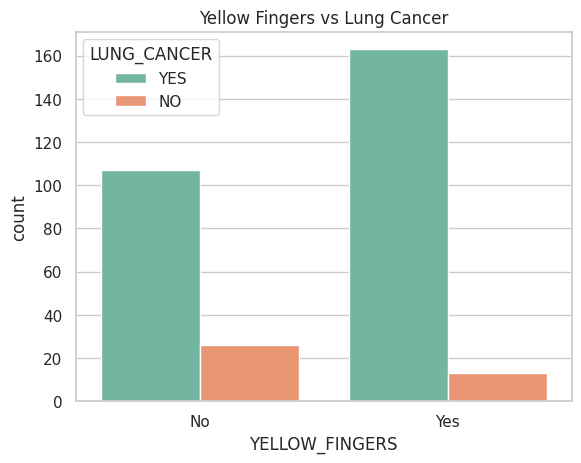

In [8]:
# Yellow Fingers
sns.countplot(data=df, x='YELLOW_FINGERS', hue='LUNG_CANCER', palette='Set2')
plt.title("Yellow Fingers vs Lung Cancer")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


**Anxiety & Peer Pressure**

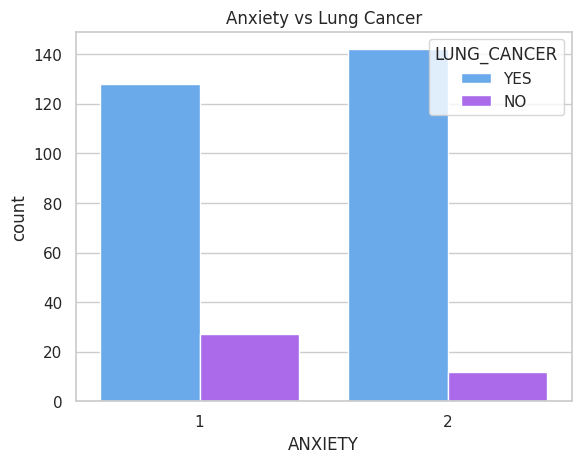

In [9]:
# Anxiety
sns.countplot(data=df, x='ANXIETY', hue='LUNG_CANCER', palette='cool')
plt.title("Anxiety vs Lung Cancer")
plt.show()


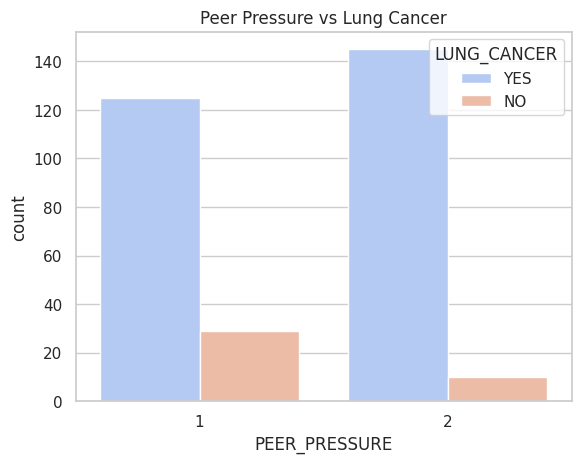

In [10]:
# Peer Pressure
sns.countplot(data=df, x='PEER_PRESSURE', hue='LUNG_CANCER', palette='coolwarm')
plt.title("Peer Pressure vs Lung Cancer")
plt.show()


**Observation:** A slight trend shows that people with anxiety and peer pressure are more likely to have lung cancer.

**Symptoms Analysis**

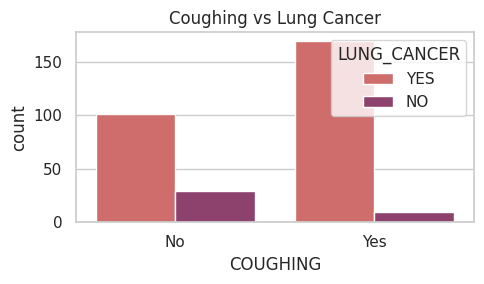

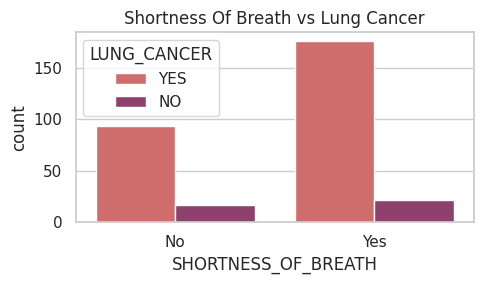

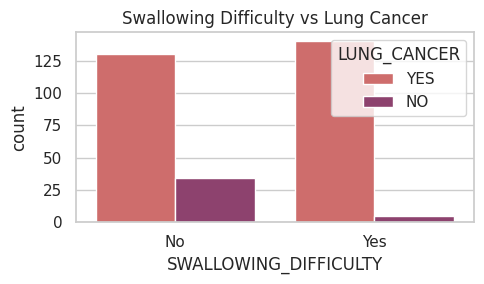

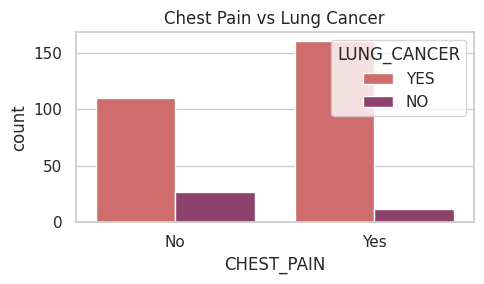

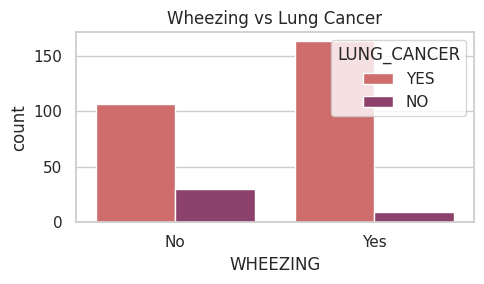

In [11]:
symptoms = ['COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'WHEEZING']

for col in symptoms:
    plt.figure(figsize=(5, 3))
    sns.countplot(data=df, x=col, hue='LUNG_CANCER', palette='flare')
    plt.title(f"{col.replace('_', ' ').title()} vs Lung Cancer")
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.tight_layout()
    plt.show()


**Observation:** Symptoms like coughing, shortness of breath, and chest pain are more prevalent among lung cancer patients.

**Correlation Heatmap**

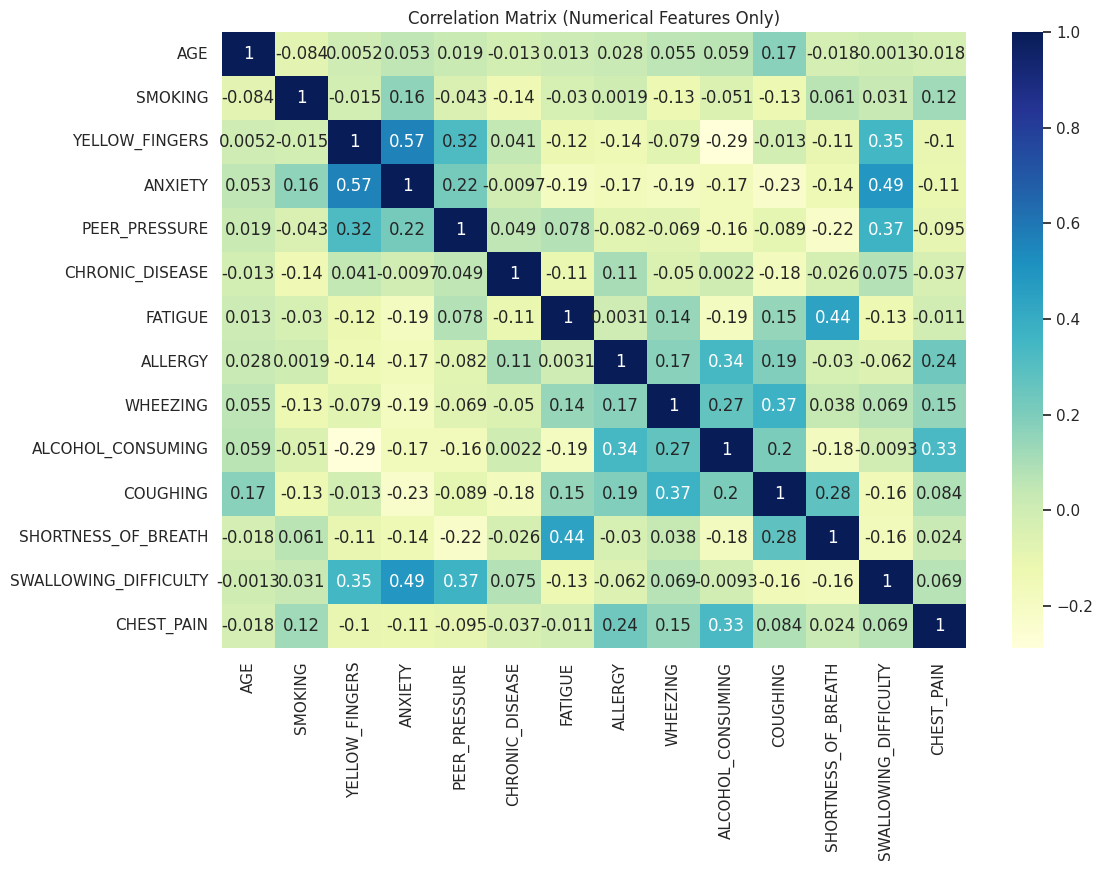

In [12]:
# Select only numeric columns before computing correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Now plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()


**Observation:** There are mild correlations between some behavioral features and symptoms (e.g., smoking and yellow fingers).

**Summary & Key Takeaways**

* The dataset has no missing values and is clean.
* The target class is imbalanced – with ~87% marked as lung cancer.
* Strong indicators of lung cancer:
    * Smoking
    * Yellow fingers
    * Chest pain
    * Coughing and shortness of breath
* Gender and anxiety might also contribute but are less dominant.
* Most participants are aged 60+, which aligns with higher risk of lung disease.
